# Project Name: Bike Rental Count Prediction uisng ML and H2O Auto ML

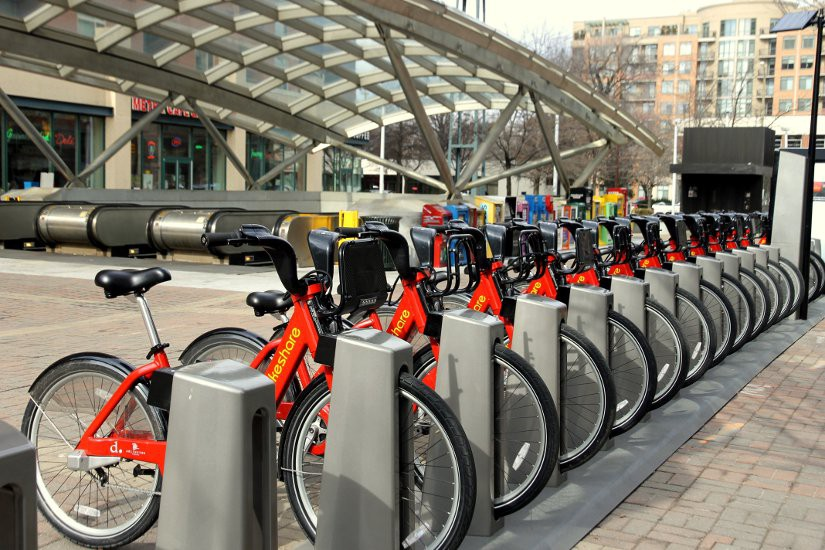

## BackGround:


### Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

### About the Data Set

### Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

### The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

## Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML

## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading the Data Set

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/day.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

## Understanding the Data Set

### The Data Set contains the following information:
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Data Analysis 

In [ ]:
df.shape

In [ ]:
df.dtypes

### Let us rename the colums for a better understanding

In [ ]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [ ]:
df.head()

### Let us convert our Data types of variables to the significant category

In [ ]:
df['datetime']=pd.to_datetime(df.datetime)
df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')

In [ ]:
df.dtypes

In [ ]:
df.describe()

## Handling Missing Values

In [ ]:
df.isnull().sum()

### Let us see how the different months and seasons affect the rental counts

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.barplot(x='year',y='total_count',data=df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.violinplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather condition wise monthly distribution of counts')
plt.show()

### Outlier Analysis

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

### Plotting Q-Q Plot

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [ ]:
plot_curve(df,'total_count')

### Co Relation Matrix

In [ ]:
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

### Data Pre Processing

In [ ]:
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

### One Hot Encoding

In [ ]:
encoded_df =pd.get_dummies(x,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_df.shape)
encoded_df.head()

In [ ]:
encoded_df=encoded_df.drop('datetime',axis=1)

In [ ]:
encoded_df

In [ ]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [ ]:
x= encoded_df.iloc[:,0:-1] ## Independent Features
y= encoded_df.iloc[:,-1] ## Dependent Varibales

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
X_train

### Our data is ready for Model Building

## Model Building

### We will be using the following models in our project:
- Linear Regression
- Random Forest Regressor

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg= LinearRegression()

In [ ]:
linreg.fit(X_train,y_train)

In [ ]:
pred= linreg.predict(X_test)

In [ ]:
lr=linreg.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',linreg.coef_)
print('Model intercept value :',linreg.intercept_)

In [ ]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

In [ ]:
sns.displot(y_test-pred)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(n_estimators=200)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

# Using Auto ML

## H2O Auto ML

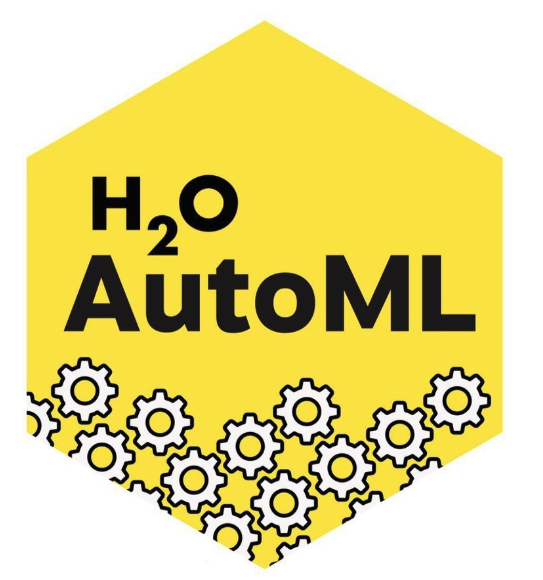

### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

### Installing H2O Auto ML

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install h2o

## Importing the H2O Python module and H2OAutoML class

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

### Loading the data

In [ ]:
df = h2o.import_file("/content/drive/MyDrive/day.csv")

In [ ]:
df.head()

## H2O auto ml can do all the data preprocessing techniques

In [ ]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [ ]:
df_train

In [ ]:
y = "cnt"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('casual')
x.remove('registered')

### Defining the model

In [ ]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [ ]:
aml.train(x=x,y=y, training_frame=df_train)

### Seeing the Leaderboard

In [ ]:
lb = aml.leaderboard

In [ ]:
lb

## Getting all the model ids

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

In [ ]:
aml.leader.model_performance(df_test)

### Getting the model details for best performing model

In [ ]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [ ]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

In [ ]:
aml.leader

In [ ]:
y_pred=aml.leader.predict(df_test)

In [ ]:
y_pred